<h2>Chargement des Bibliothèques et des Données</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurer le style de Seaborn pour des graphiques plus esthétiques
sns.set(style="whitegrid")

# Charger le dataset transformé
data = pd.read_csv("weather_data_transformed.csv")

# Convertir la colonne 'Date' en datetime si ce n'est pas déjà fait
data['Date'] = pd.to_datetime(data['Date'])

# Afficher les premières lignes du DataFrame pour vérification
print(data.head())


                 Date  Temperature  Precipitation  Humidity   Latitude  \
0 2023-01-02 08:00:00          9.7              0      40.5  31.051307   
1 2023-01-02 14:00:00          9.2             10      63.1 -10.336078   
2 2023-01-02 23:00:00          8.4             15      33.9  52.667066   
3 2023-01-04 02:00:00         10.9              0      57.1 -21.988942   
4 2023-01-04 05:00:00         10.7              0      50.3   7.253376   

    Longitude  Temperature_F  Is_Hot  Temp_Fahrenheit  
0  118.643699          49.46       0            49.46  
1  111.846085          48.56       0            48.56  
2   52.461016          47.12       0            47.12  
3  -41.021663          51.62       0            51.62  
4 -147.686580          51.26       0            51.26  


<h2>Exercice 1 : Modélisation de la Température avec Régression Linéaire</h2>

<h3>Étape 1 : Chargement et Préparation des Données</h3>

In [2]:
# Sélection des features et de la cible
features = ['Precipitation', 'Humidity', 'Latitude', 'Longitude']
X = data[features]
y = data['Temperature']

# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Jeu d'entraînement : {X_train.shape[0]} échantillons")
print(f"Jeu de test : {X_test.shape[0]} échantillons")


Jeu d'entraînement : 800 échantillons
Jeu de test : 200 échantillons


<h3> Étape 2 : Normalisation des Données </h3>

In [3]:
# Initialisation du scaler
scaler = StandardScaler()

# Entraînement du scaler sur le jeu d'entraînement et transformation
X_train_scaled = scaler.fit_transform(X_train)

# Transformation du jeu de test
X_test_scaled = scaler.transform(X_test)

<h3> Étape 3 : Création et Entraînement du Modèle </h3>

In [4]:
# Instanciation du modèle de régression linéaire
lr_model = LinearRegression()

# Entraînement du modèle
lr_model.fit(X_train_scaled, y_train)

print("Modèle de régression linéaire entraîné.")

Modèle de régression linéaire entraîné.


<h3>Étape 4 : Évaluation des Performances</h3>

In [5]:
# Prédictions sur le jeu de test
y_pred = lr_model.predict(X_test_scaled)

# Calcul du RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE sur le jeu de test : {rmse:.2f} °C")

# Calcul du R²
r2 = r2_score(y_test, y_pred)
print(f"R² sur le jeu de test : {r2:.2f}")

RMSE sur le jeu de test : 6.48 °C
R² sur le jeu de test : 0.67


<h2>Exercice 2 : K-Means Clustering pour la Classification des Régions Climatiques</h2>

<h3>Étape 1 : Préparation des Données</h3>

In [6]:
# Sélecti des features pour le clustering
clustering_features = ['Temperature', 'Precipitation', 'Humidity', 'Latitude', 'Longitude']
X_cluster = data[clustering_features]

# Normalisaion des données de clustering
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

<h3>Étape 2 : Construction du Modèle K-Means</h3>

In [7]:
# Instanciation du modèle K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Entraînemen du modèle
kmeans.fit(X_cluster_scaled)

# Attribution des cluster aux donnée
data['Cluster'] = kmeans.labels_

print("Clustering K-Means effectué avec 3 clusters.")

Clustering K-Means effectué avec 3 clusters.


<h3>Étape 3 : Visualisation des Clusters</h3>

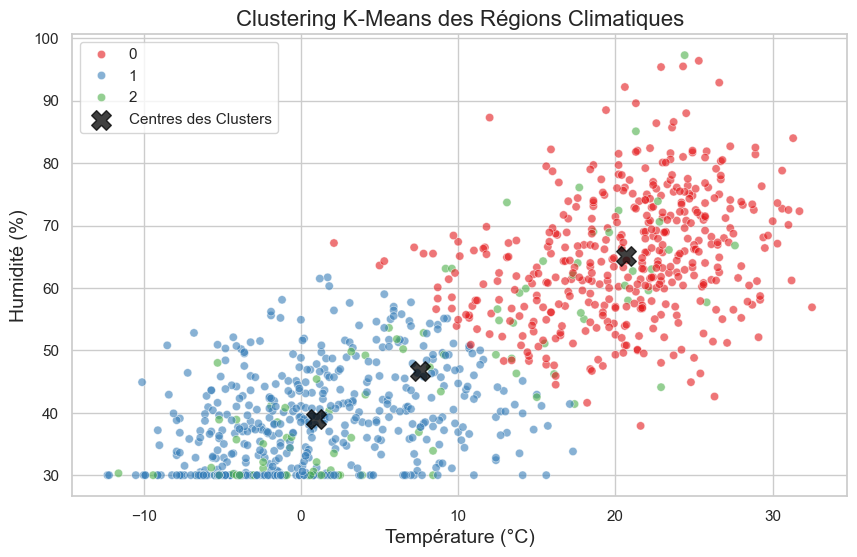

In [8]:
# Définir la taille du graphique
plt.figure(figsize=(10,6))

# Créer le scatter plot
sns.scatterplot(
    x='Temperature', y='Humidity',
    hue='Cluster',
    palette='Set1',
    data=data,
    alpha=0.6
)

# Ajouter les centres des clusters
centers = scaler_cluster.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0], centers[:, 2],
    c='yellow', s=200, alpha=0.75, marker='X',
    label='Centres des Clusters'
)

# Ajouter les titres et les étiquettes
plt.title('Clustering K-Means des Régions Climatiques', fontsize=16)
plt.xlabel('Température (°C)', fontsize=12)
plt.ylabel('Humidité (%)', fontsize=12)
plt.legend()
plt.show()